<a href="https://colab.research.google.com/github/lolobq/ECGR-5105-Intro_To_Machine_Learning/blob/main/Homework5/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Data

In [1]:
# Torch Libraries
import torch
import torch.optim as optim

# Other Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Code for Problem 1

Define Functions for Model, Loss, and Training

In [2]:
def nonlinear_model(t_u, w2, w1, b):
    """
    Build a nonlinear model.

    Parameters:
    t_u : The input data
    w2 : Value for the theta 2
    w1 : Value for the theta 1
    b : The theta 0 value

    Returns:
    t_c : The value after creating a linear relationship from the input and desired output
    """
    t_c = w2*t_u**2 + w1*t_u + b
    return t_c

In [3]:
def loss(t_p, t_c):
    """
    Calculates the loss of the nonlinear model. Should be a positive number

    Parameters:
    t_p : The predicted values
    t_c : The calculated values

    Returns:
    squared_diffs.mean() : The average value of the loss calculated as the difference between the predicted and calculated values squared.
    """
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [4]:
def nonlinear_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
    """
    Training for the model.

    Parameters:
    epochs : The number of training iterations
    optimizer : The gradient descent optimizer used
    params : Array storing the theta values
    t_u_train : The x values training set
    t_u_valid : The x values validation set
    t_c_train : The y values training set
    t_c_valid : The y values validation set

    Returns:
    params : The calculated theta values
    """
    for epoch in range(1, epochs+1):
      t_p_train = nonlinear_model(t_u_train, *params)
      train_loss = loss(t_p_train, t_c_train)

      t_p_valid = nonlinear_model(t_u_valid, *params)
      valid_loss = loss(t_p_valid, t_c_valid)

      optimizer.zero_grad()
      train_loss.backward()
      optimizer.step()

      if epoch % 500 == 0:
        print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}\n')

    return params

Create Linear Optimizer

In [5]:
def linear_model1(t_u, w, b):
  return w*t_u + b

In [6]:
def linear_training1(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  for epoch in range(1, epochs+1):
    t_p_train = linear_model1(t_u_train, *params)
    train_loss = loss(t_p_train, t_c_train)

    t_p_valid = linear_model1(t_u_valid, *params)
    valid_loss = loss(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}\n')

  return params

Declare Temperature Values

In [7]:
# X values
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
# Y values
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]

t_u = torch.tensor(t_u)
t_c = torch.tensor(t_c)

Create SGD and Adam Optimizers with Pre-Processing

SGD Optimizers:

Learning rate of 0.1

Epochs: 500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 4000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 4500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 5000, 	Training Loss: nan, 	Validation Loss: nan

Learning rate of 0.01

Epochs: 500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3500

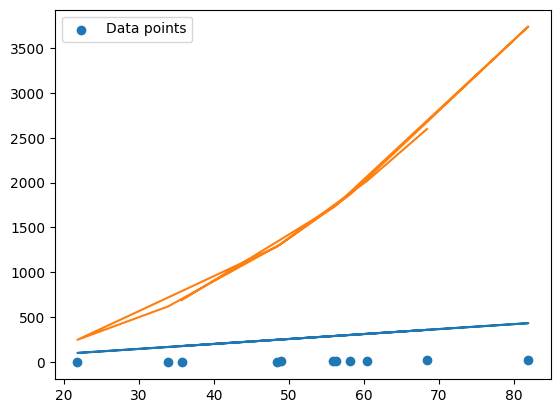

In [8]:
# Pre-processing and normalizing data
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

# Create models with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Create SGD Optimizers for different learning rates
print('SGD Optimizers:\n')
for rate in learning_rates:
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer = optim.SGD([params], lr = rate)
  print(f'Learning rate of {rate}\n')
  nonlinear_training(epochs=5000, optimizer=optimizer, params=params, t_u_train=train_t_un, t_u_valid=val_t_un, t_c_train=train_t_c, t_c_valid=val_t_c)

# Create Adam Optimizers for different learning rates
print('Adam Optimizers:\n')
for rate in learning_rates:
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer = optim.Adam([params], lr = rate)
  print(f'Learning rate of {rate}\n')
  nonlinear_training(epochs=5000, optimizer=optimizer, params=params, t_u_train=train_t_un, t_u_valid=val_t_un, t_c_train=train_t_c, t_c_valid=val_t_c)

# Plot Nonlinear vs Linear Models
linear_params = torch.tensor([1.0, 0.0], requires_grad=True)
nonlinear_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

linear_optimizer = optim.SGD([linear_params], lr = 0.01)
nonlinear_optimizer = optim.SGD([nonlinear_params], lr = 0.0001)

linear = linear_training1(5000, linear_optimizer, linear_params, train_t_un, val_t_un, train_t_c, val_t_c)
nonlinear = nonlinear_training(5000, nonlinear_optimizer, nonlinear_params, train_t_un, val_t_un, train_t_c, val_t_c)

t_p_lin = linear_model1(t_u, *linear).detach().numpy()
t_p_non = nonlinear_model(t_u, *nonlinear).detach().numpy()

plt.scatter(t_u, t_c, label = 'Data points')
plt.plot(t_u, t_p_lin)
plt.plot(t_u, t_p_non)

plt.legend()
plt.show()

# Code for Problem 2

Bring Data In

In [9]:
# Import csv data from my GitHub repo
housing_url = 'https://raw.githubusercontent.com/lolobq/ECGR-5105-Intro_To_Machine_Learning/master/Homework5/Housing.csv'
df = pd.read_csv(housing_url)

Functions for Model and Training

In [10]:
def linear_model2(t_x, w5, w4, w3, w2, w1, b):
  """
  Build a linear model.

  Parameters:
  t_x : The input data
  thetas : Values for the thetas

  Returns:
  The value after creating a linear relationship from the input and desired output
  """
  return torch.matmul(t_x, params[:-1].double()) + params[-1].double()

In [11]:
def linear_training2(epochs, optimizer, params, t_x_train, t_x_valid, t_y_train, t_y_valid):
  train_losses = []
  valid_losses = []

  for epoch in range(1, epochs+1):
    t_p_train = linear_model2(t_x_train, *params)
    train_loss = loss(t_p_train, t_y_train)

    t_p_valid = linear_model2(t_x_valid, *params)
    valid_loss = loss(t_p_valid, t_y_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}\n')

  return params, train_losses, valid_losses

Pre-Processing

In [12]:
# Get the data
varlist = ["area", "bedrooms", "bathrooms", "stories", "parking"]

x = df[varlist].values
y = df['price'].values

# Standardize input features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Standardize output variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

t_x = torch.tensor(x_scaled)
t_y = torch.tensor(y_scaled)

# Creating training and validation sets
n_samples = t_x.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_x = t_x[train_indices]
train_t_y = t_y[train_indices]

val_t_x = t_x[val_indices]
val_t_y = t_y[val_indices]

SGD Optimizers:

Learning rate of 0.1

Epochs: 500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 1000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 1500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 2000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 2500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 3000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 3500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 4000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 4500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 5000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Learning rate of 0.01

Epochs: 500, 	Training Loss: 0.458730, 	Validation Loss: 0.360941

Epochs: 1000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 1500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 2000, 	Training Loss: 0.458730, 	Validation Loss

SGD Optimizers

In [13]:
# Learning rate of 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.1)
print('Learning rate of 0.1\n')
model1, train_loss1, valid_loss1 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss1 = np.array([item.detach().item() for item in train_loss1])
sgd_valid_loss1 = np.array([item.detach().item() for item in valid_loss1])

# Learning rate of 0.01
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.01)
print('Learning rate of 0.01\n')
model2, train_loss2, valid_loss2 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss2 = np.array([item.detach().item() for item in train_loss2])
sgd_valid_loss2 = np.array([item.detach().item() for item in valid_loss2])

# Learning rate of 0.001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.001)
print('Learning rate of 0.001\n')
model3, train_loss3, valid_loss3 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss3 = np.array([item.detach().item() for item in train_loss3])
sgd_valid_loss3 = np.array([item.detach().item() for item in valid_loss3])

# Learning rate of 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.0001)
print('Learning rate of 0.0001\n')
model4, train_loss4, valid_loss4 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss4 = np.array([item.detach().item() for item in train_loss4])
sgd_valid_loss4 = np.array([item.detach().item() for item in valid_loss4])

Learning rate of 0.1

Epochs: 500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 1000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 1500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 2000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 2500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 3000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 3500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 4000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 4500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 5000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Learning rate of 0.01

Epochs: 500, 	Training Loss: 0.458730, 	Validation Loss: 0.360941

Epochs: 1000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 1500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 2000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epoch

Adam Optimizers

In [14]:
# Learning rate of 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.1)
print('Learning rate of 0.1\n')
model1, train_loss1, valid_loss1 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss1 = np.array([item.detach().item() for item in train_loss1])
adam_valid_loss1 = np.array([item.detach().item() for item in valid_loss1])

# Learning rate of 0.01
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.01)
print('Learning rate of 0.01\n')
model2, train_loss2, valid_loss2 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss2 = np.array([item.detach().item() for item in train_loss2])
adam_valid_loss2 = np.array([item.detach().item() for item in valid_loss2])

# Learning rate of 0.001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.001)
print('Learning rate of 0.001\n')
model3, train_loss3, valid_loss3 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss3 = np.array([item.detach().item() for item in train_loss3])
adam_valid_loss3 = np.array([item.detach().item() for item in valid_loss3])

# Learning rate of 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.0001)
print('Learning rate of 0.0001\n')
model4, train_loss4, valid_loss4 = linear_training2(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss4 = np.array([item.detach().item() for item in train_loss4])
adam_valid_loss4 = np.array([item.detach().item() for item in valid_loss4])

Learning rate of 0.1

Epochs: 500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 1000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 1500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 2000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 2500, 	Training Loss: 0.458731, 	Validation Loss: 0.361037

Epochs: 3000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 3500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 4000, 	Training Loss: 0.458730, 	Validation Loss: 0.361028

Epochs: 4500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 5000, 	Training Loss: 0.458778, 	Validation Loss: 0.360968

Learning rate of 0.01

Epochs: 500, 	Training Loss: 0.458731, 	Validation Loss: 0.361048

Epochs: 1000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 1500, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epochs: 2000, 	Training Loss: 0.458730, 	Validation Loss: 0.361019

Epoch

SGD Plots

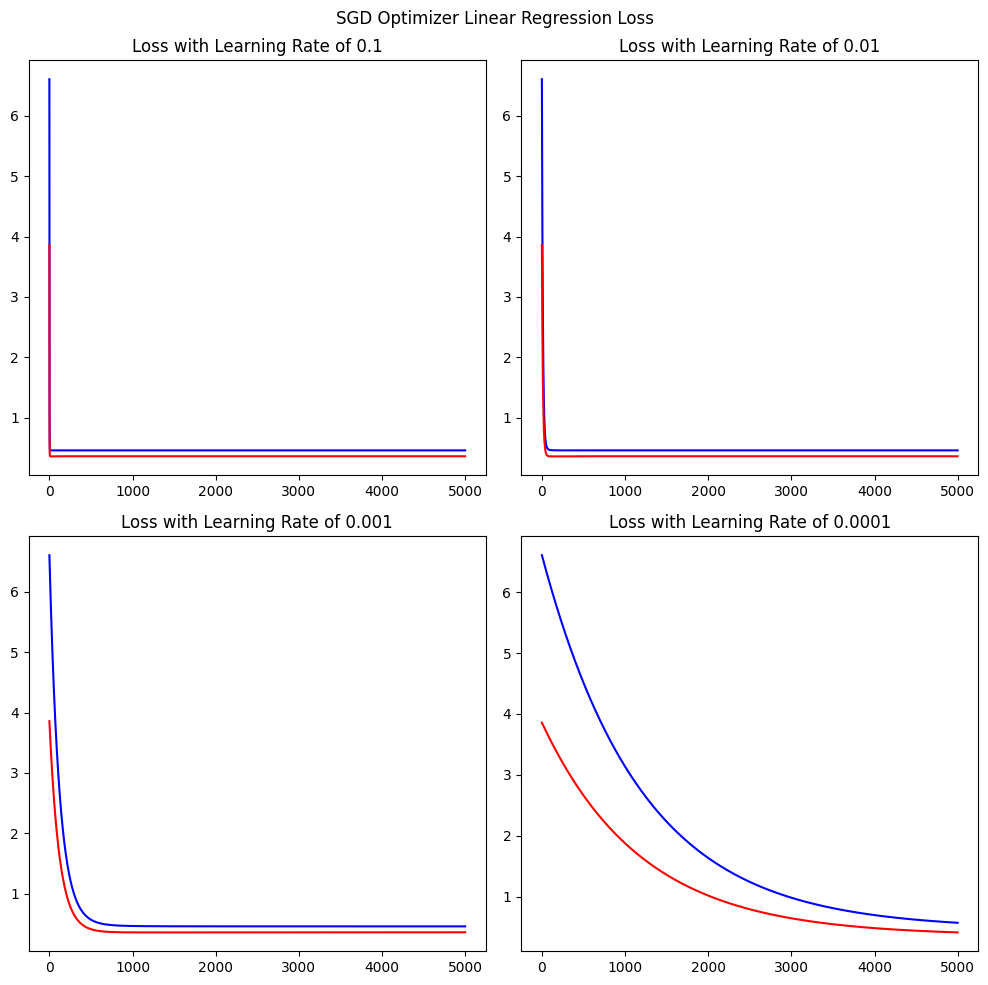

In [15]:
plt.figure(figsize=(10, 10))
plt.suptitle('SGD Optimizer Linear Regression Loss')

plt.subplot(2,2,1)
plt.plot(sgd_train_loss1, color='blue')
plt.plot(sgd_valid_loss1, color='red')
plt.title('Loss with Learning Rate of 0.1')

plt.subplot(2,2,2)
plt.plot(sgd_train_loss2, color='blue')
plt.plot(sgd_valid_loss2, color='red')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,3)
plt.plot(sgd_train_loss3, color='blue')
plt.plot(sgd_valid_loss3, color='red')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,4)
plt.plot(sgd_train_loss4, color='blue')
plt.plot(sgd_valid_loss4, color='red')
plt.title('Loss with Learning Rate of 0.0001')

plt.tight_layout()
plt.show()

Adam Plots

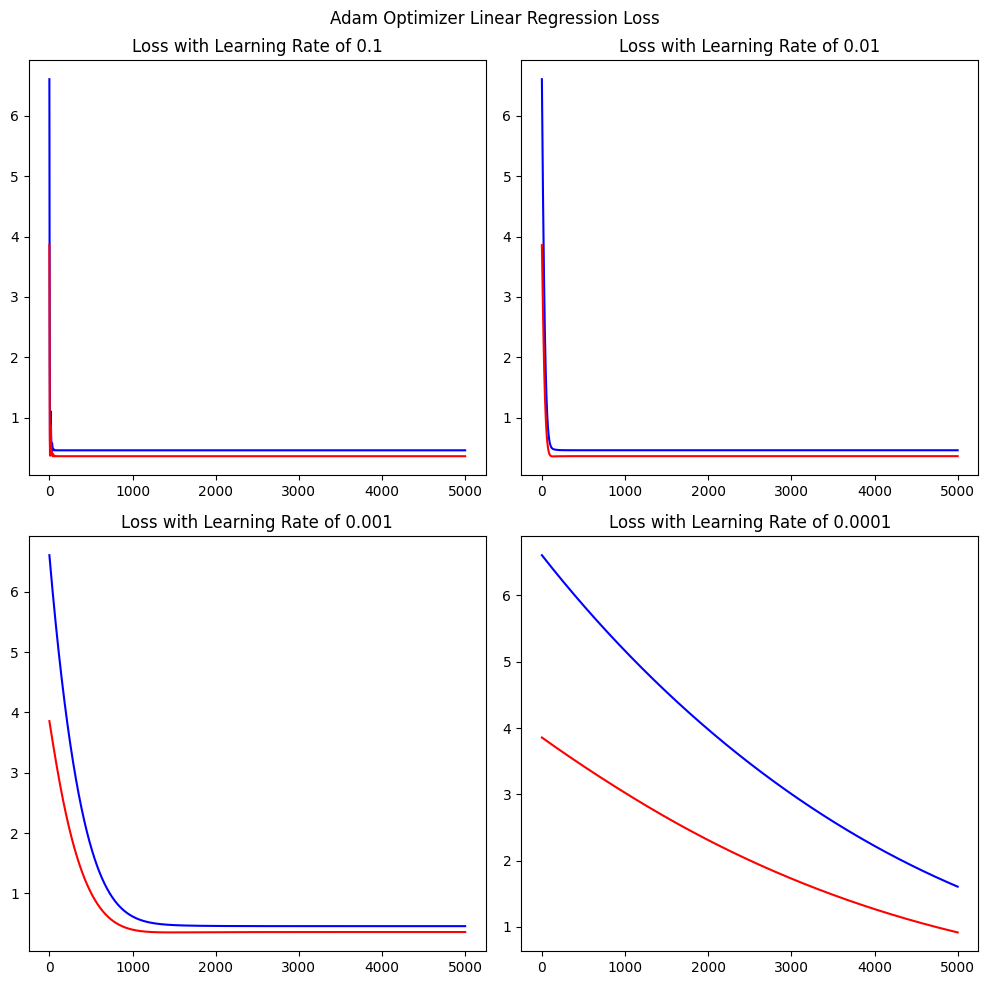

In [16]:
plt.figure(figsize=(10, 10))
plt.suptitle('Adam Optimizer Linear Regression Loss')

plt.subplot(2,2,1)
plt.plot(adam_train_loss1, color='blue')
plt.plot(adam_valid_loss1, color='red')
plt.title('Loss with Learning Rate of 0.1')

plt.subplot(2,2,2)
plt.plot(adam_train_loss2, color='blue')
plt.plot(adam_valid_loss2, color='red')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,3)
plt.plot(adam_train_loss3, color='blue')
plt.plot(adam_valid_loss3, color='red')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,4)
plt.plot(adam_train_loss4, color='blue')
plt.plot(adam_valid_loss4, color='red')
plt.title('Loss with Learning Rate of 0.0001')

plt.tight_layout()
plt.show()

# Code for Problem 3

Bring Data In

In [28]:
# Import csv data from my GitHub repo
df2 = pd.read_csv(housing_url)

# Map string variables to binary values
variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_mapping(x):
  return x.map({'no' : 0, 'yes' : 1})

df2[variable_list] = df2[variable_list].apply(binary_mapping)
df2 = df2.drop('furnishingstatus', axis=1)

Function for Model

In [29]:
def linear_model3(t_x, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b):
  """
  Build a linear model.

  Parameters:
  t_x : The input data
  thetas : Values for the thetas

  Returns:
  The value after creating a linear relationship from the input and desired output
  """
  return torch.matmul(t_x, params[:-1].double()) + params[-1].double()

In [30]:
def linear_training3(epochs, optimizer, params, t_x_train, t_x_valid, t_y_train, t_y_valid):
  train_losses = []
  valid_losses = []

  for epoch in range(1, epochs+1):
    t_p_train = linear_model3(t_x_train, *params)
    train_loss = loss(t_p_train, t_y_train)

    t_p_valid = linear_model3(t_x_valid, *params)
    valid_loss = loss(t_p_valid, t_y_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}\n')

  return params, train_losses, valid_losses

Pre-Processing

In [31]:
# Get the data
y = df2['price'].values
df2 = df2.drop('price', axis=1)
x = df2.values

# Standardize input features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Standardize output variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

t_x = torch.tensor(x_scaled)
t_y = torch.tensor(y_scaled)

# Creating training and validation sets
n_samples = t_x.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_x = t_x[train_indices]
train_t_y = t_y[train_indices]

val_t_x = t_x[val_indices]
val_t_y = t_y[val_indices]

SGD Optimizers

In [32]:
# Learning rate of 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.1)
print('Learning rate of 0.1\n')
model5, train_loss5, valid_loss5 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss5 = np.array([item.detach().item() for item in train_loss5])
sgd_valid_loss5 = np.array([item.detach().item() for item in valid_loss5])

# Learning rate of 0.01
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.01)
print('Learning rate of 0.01\n')
model6, train_loss6, valid_loss6 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss6 = np.array([item.detach().item() for item in train_loss6])
sgd_valid_loss6 = np.array([item.detach().item() for item in valid_loss6])

# Learning rate of 0.001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.001)
print('Learning rate of 0.001\n')
model7, train_loss7, valid_loss7 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss7 = np.array([item.detach().item() for item in train_loss7])
sgd_valid_loss7 = np.array([item.detach().item() for item in valid_loss7])

# Learning rate of 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr = 0.0001)
print('Learning rate of 0.0001\n')
model8, train_loss8, valid_loss8 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
sgd_train_loss8 = np.array([item.detach().item() for item in train_loss8])
sgd_valid_loss8 = np.array([item.detach().item() for item in valid_loss8])

Learning rate of 0.1

Epochs: 500, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 1000, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 1500, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 2000, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 2500, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 3000, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 3500, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 4000, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 4500, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 5000, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Learning rate of 0.01

Epochs: 500, 	Training Loss: 0.327614, 	Validation Loss: 0.346775

Epochs: 1000, 	Training Loss: 0.327611, 	Validation Loss: 0.347543

Epochs: 1500, 	Training Loss: 0.327611, 	Validation Loss: 0.347556

Epochs: 2000, 	Training Loss: 0.327611, 	Validation Loss: 0.347556

Epoch

Adam Optimizers

In [33]:
# Learning rate of 0.1
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.1)
print('Learning rate of 0.1\n')
model5, train_loss5, valid_loss5 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss5 = np.array([item.detach().item() for item in train_loss5])
adam_valid_loss5 = np.array([item.detach().item() for item in valid_loss5])

# Learning rate of 0.01
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.01)
print('Learning rate of 0.01\n')
model6, train_loss6, valid_loss6 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss6 = np.array([item.detach().item() for item in train_loss6])
adam_valid_loss6 = np.array([item.detach().item() for item in valid_loss6])

# Learning rate of 0.001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.001)
print('Learning rate of 0.001\n')
model7, train_loss7, valid_loss7 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss7 = np.array([item.detach().item() for item in train_loss7])
adam_valid_loss7 = np.array([item.detach().item() for item in valid_loss7])

# Learning rate of 0.0001
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr = 0.0001)
print('Learning rate of 0.0001\n')
model8, train_loss8, valid_loss8 = linear_training3(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
adam_train_loss8 = np.array([item.detach().item() for item in train_loss8])
adam_valid_loss8 = np.array([item.detach().item() for item in valid_loss8])

Learning rate of 0.1

Epochs: 500, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 1000, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 1500, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 2000, 	Training Loss: 0.327611, 	Validation Loss: 0.347485

Epochs: 2500, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 3000, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 3500, 	Training Loss: 0.327611, 	Validation Loss: 0.347647

Epochs: 4000, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 4500, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 5000, 	Training Loss: 0.327614, 	Validation Loss: 0.347107

Learning rate of 0.01

Epochs: 500, 	Training Loss: 0.327644, 	Validation Loss: 0.345123

Epochs: 1000, 	Training Loss: 0.327611, 	Validation Loss: 0.347555

Epochs: 1500, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epochs: 2000, 	Training Loss: 0.327611, 	Validation Loss: 0.347557

Epoch

SGD Plots

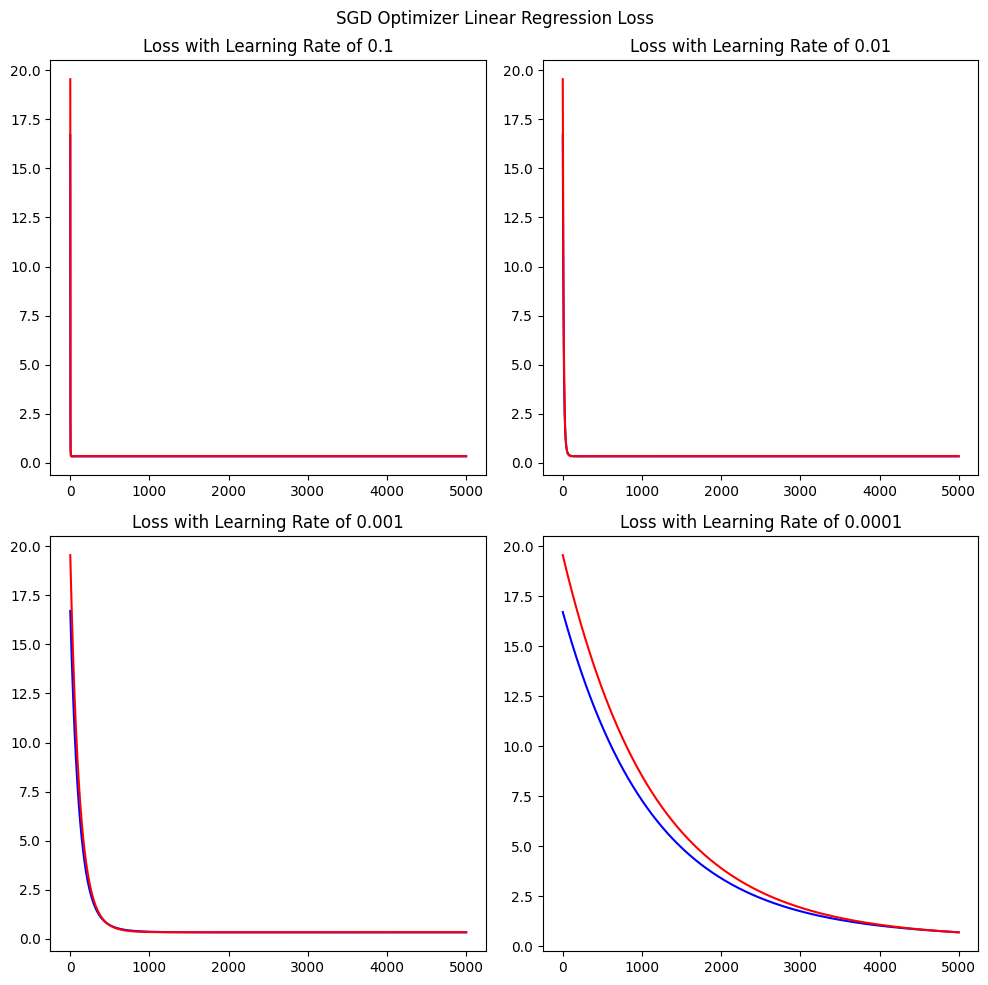

In [34]:
plt.figure(figsize=(10, 10))
plt.suptitle('SGD Optimizer Linear Regression Loss')

plt.subplot(2,2,1)
plt.plot(sgd_train_loss5, color='blue')
plt.plot(sgd_valid_loss5, color='red')
plt.title('Loss with Learning Rate of 0.1')

plt.subplot(2,2,2)
plt.plot(sgd_train_loss6, color='blue')
plt.plot(sgd_valid_loss6, color='red')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,3)
plt.plot(sgd_train_loss7, color='blue')
plt.plot(sgd_valid_loss7, color='red')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,4)
plt.plot(sgd_train_loss8, color='blue')
plt.plot(sgd_valid_loss8, color='red')
plt.title('Loss with Learning Rate of 0.0001')

plt.tight_layout()
plt.show()

Adam Plots

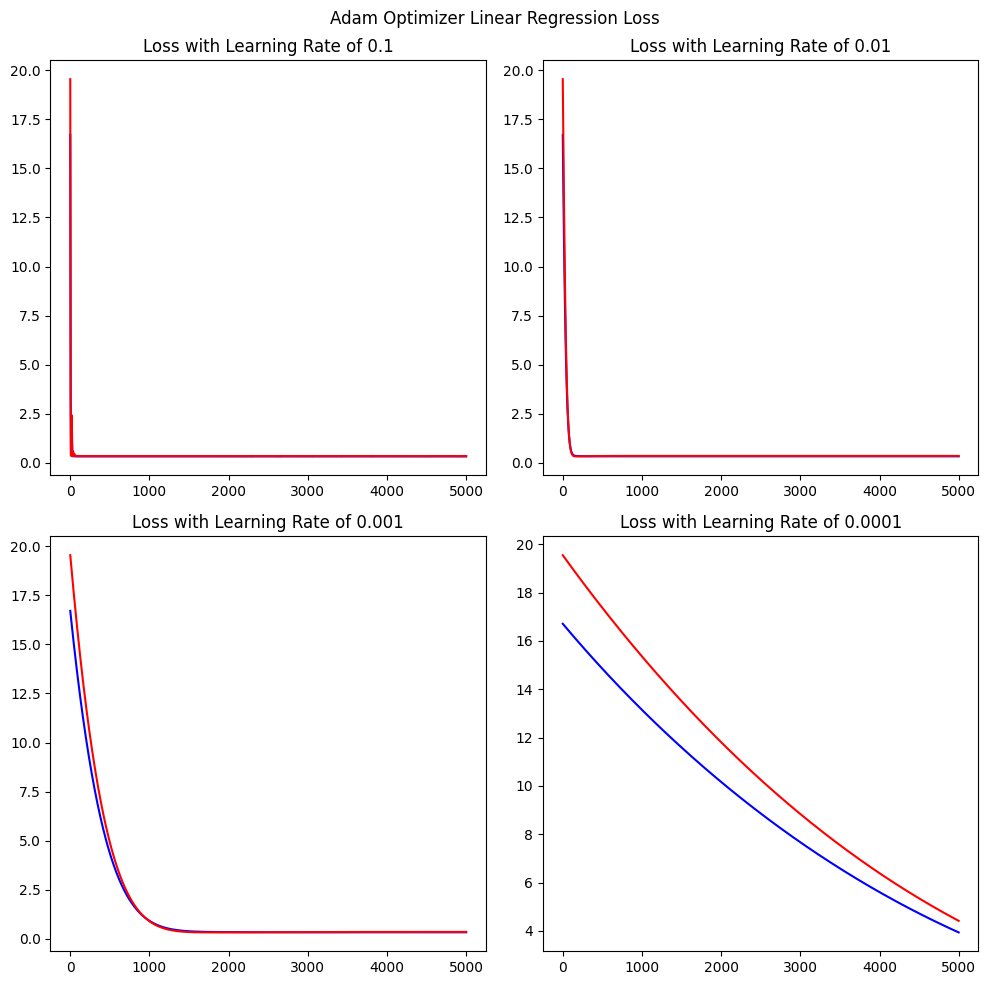

In [35]:
plt.figure(figsize=(10, 10))
plt.suptitle('Adam Optimizer Linear Regression Loss')

plt.subplot(2,2,1)
plt.plot(adam_train_loss5, color='blue')
plt.plot(adam_valid_loss5, color='red')
plt.title('Loss with Learning Rate of 0.1')

plt.subplot(2,2,2)
plt.plot(adam_train_loss6, color='blue')
plt.plot(adam_valid_loss6, color='red')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,3)
plt.plot(adam_train_loss7, color='blue')
plt.plot(adam_valid_loss7, color='red')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,4)
plt.plot(adam_train_loss8, color='blue')
plt.plot(adam_valid_loss8, color='red')
plt.title('Loss with Learning Rate of 0.0001')

plt.tight_layout()
plt.show()